## <center> Activation Function</center>

<b><u>Table of Content</u></b>
1. [Introduction](#section1)<br>
2. [Activation Function](#ActivationFunction)<br>
3. [Types of Activation Functions](#TypesofActivationFunctions)<br>
4. [Binary Step](#BinaryStep)<br>
5. [Linear Functions](#LinearFunction)<br>
6. [Non-Linear Functions](#NonLinearFunction)<br>
7. [Sigmoid Function](#SigmoidFunction)<br>
8. [Hyperbolic Tangent](#HyperbolicTangent)<br>
9. [ReLU (Rectified Linear Unit)](#ReLU)<br>
10. [Leaky ReLU](#LeakyReLU)<br>
10. [Parameterized Leaky ReLU](#ParamReLU)<br>
10. [ELU (Exponential Linear Unit)](#ELU)<br>
10. [Swish Function](#Swish)<br>
10. [SoftMax Function](#Softmax)<br>
10. [How to choose right activation function](#ChooseRightFUction)<br>


<a id=section1></a>
## Introduction

A neuron in neural network which are trained to make machines predictions an easy task, usually consists of three main aspects. Weights, Bias and Activation function. The flow in which all three work can be seen below:
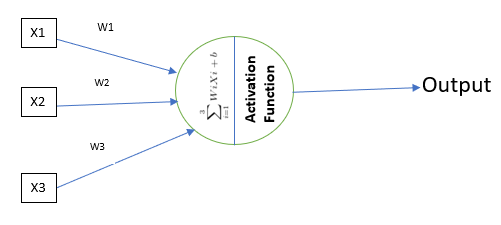

The above neuron can be compared to natural neuron as below
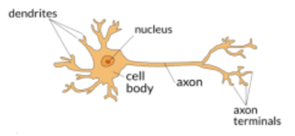

In this article we will learn about few activation functions which help a neural network to find right output based on the input given. In modern world back propagation method is used to find best weights and bias that makes the error in model prediction least. Activation function plays a key role while this process because output from each “active” neuron(s) works as input to further neurons and so on affecting the output neuron’s output. The word active is highlighted because to avoid overfitting we drop few neurons making the inactive.

<a id=ActivationFunction></a>
# Activation Function:

An activation functions is a mathematical equation which help neural network to learn and be trained on some complex patterns and relationships. As the above image shows all the inputs are linear combinations in the form of product of each input given and weights. The combination of inputs will be then passed to activation function resulting in an output.
<p>
<b>“Why we need Activation Function?”</b>, consider everything going smooth and straight forward in your life. You will defiantly think something is wrong or you are not learning any new thing. On the other hand, if you have seen many new things which may be unique and complex, there will be lot of learning. Same real-world use case applied for Activation Functions. If a neural network won’t have Non-Linearity and complexities attached, very less likely the model will learn from various observations. That’s why the Activation Functions are integral part of neural network.</p>


<a id=TypesofActivationFunctions></a>
# Types of Activation Functions
The family tree of activation functions can be understood as below:
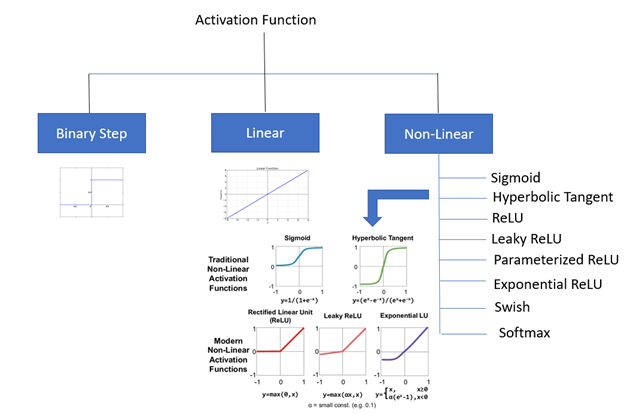
Let’s see the detail and mathematics behind each activation functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id=BinaryStep></a> 
# Binary Step
As the name suggests this works between binary numbers i.e. 0 and 1 but stepwise. Means it will be either 0 or 1. Can be implemented as below.
<p>
Features:<br>
1. Gives output either 0 or 1.<br>
2. It works as step function.<br>
3. The Gradient will be "0" always.<br>
4. Since the gradients will be always 0 so usage of this function is never recommended in modern network as no parameter training will happen in back propagation.
</p>


In [2]:
def binary_step_function(x):
    if x<0:
        return 0
    else:
        return 1

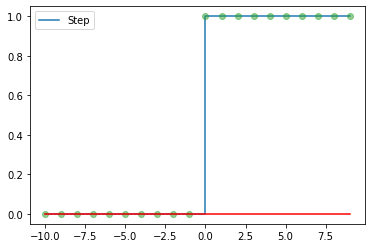

In [3]:
x=np.arange(-10,10)
y=[binary_step_function(x1) for x1 in x]
y_grad=[0 for x1 in x]
plt.step(x, y, where='post', label='Step')
plt.plot(x, y, 'C2o', alpha=0.5)
plt.plot(x,y_grad,"red")
plt.legend()

<a id=LinearFunction></a> 
# Linear Function

The biggest drawback of Basic Step function is the gradient. Since it is 0 always to learning and weight update never happens. The linear activation function mitigates this issue.

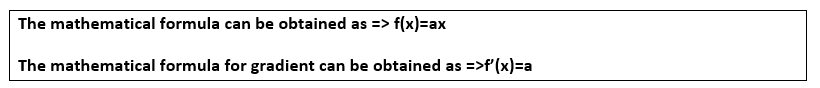

Features:
1.	Gives a linear relationship in input and output.
2.	Gives a discrete output i.e. based on input, the output can range between -  to + , so cab be used for regression problems also.
3.	Since it is linear relationship so learning complex patterns will be difficult for neural networks.


In [4]:
def linear_activation_function(a,x):
    return a*x

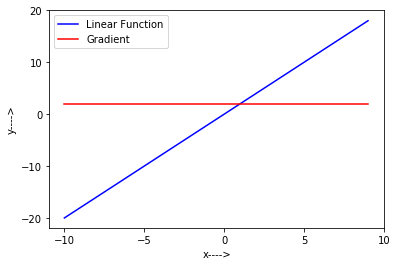

In [5]:
a=2
y=[linear_activation_function(a,x1) for x1 in x]
y_grad=[a for x1 in x]
plt.plot(x, y, "blue",label="Linear Function")
plt.plot(x,y_grad,"red", label="Gradient")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.xticks([-10,-5,0,5,10])
plt.yticks([-20,-10,0,10,20])
plt.legend()

<a id=NonLinearFunction></a> 
# Non-Linear Functions

So traditional activation functions come with their own issues like gradient as 0 or being very simple and not facilitate models to learn complex patterns. Then comes non linear functions which can be applied as activation function to introduce complexity and non-linearity. There are several Non-Linear Functions which can be discussed as below:

<a id=SigmoidFunction></a>
## Sigmoid Function

Sigmoid has been a buzz world in Data Science field. This has been widely used function. Mostly used in output layer for binary classification models. The implementation and graph can be depicted as below:

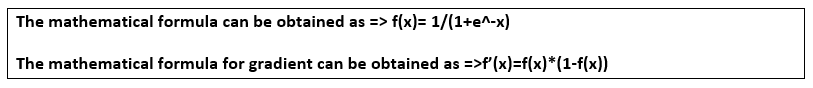

Features:
1.	Gives binary output i.e. either 0 or 1.
2.	This function is not symmetric around 0 i.e. the out put is always positive.
3.	Mainly used in output layer for binary classifications.
4.	Usually avoid to be used in hidden layer.
5.	In Deep network if used in hidden layer, it caused demising gradient problem which causes the learnable parameters not to updated resulting network not learning anything after few layers.
6.	The gradient value always vary between 0 to .25 which causes gradient clipping exposing it disadvantage while using in deep layered network.


In [6]:
def sigmoid_activation_function(x):
    return (1/(1+np.exp(-x)))

In [7]:
def sigmoid_gradiant(x):
    return (sigmoid_activation_function(x)*
            (1-sigmoid_activation_function(x)))

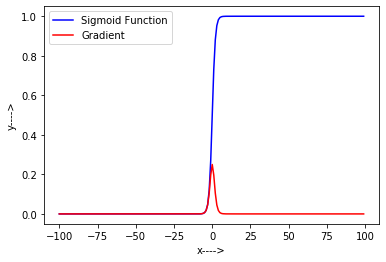

In [8]:
x=np.arange(-100,100)
y=[sigmoid_activation_function(x1) for x1 in x]
y_grad=[(sigmoid_gradiant(x1)) for x1 in x]
plt.plot(x, y, "blue",label="Sigmoid Function")
plt.plot(x,y_grad,"red", label="Gradient")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=HyperbolicTangent></a>
## Hyperbolic Tangent

Also known as Tanh function. The output range for any given input varies between -1 and 1. 
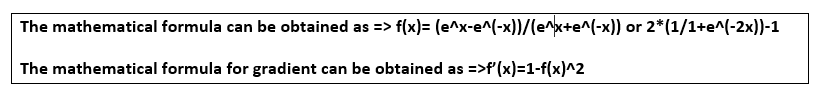

Features:
1.	Widely used activation function across all layers.
2.	Output ranges from -1 to 1 based on any input.
3.	This function is ZERO centric i.e. the output values are symmetric around 0 giving output both positive and negative.
4.	The gradient value varies between 0 and 1. This function can be used in deep layered network as the gradient does not diminish very fast.


In [9]:
def tanh_activation_function(x):
    return 2*sigmoid_activation_function(2*x)-1

In [10]:
def tanh_derivative(x):
    return (1-np.square(tanh_activation_function(x)))

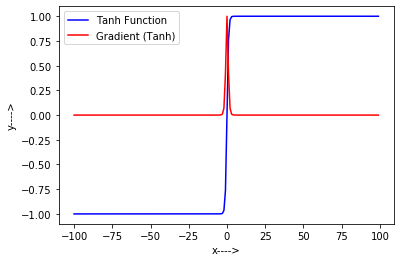

In [11]:
x=np.arange(-100,100)
y=[tanh_activation_function(x1) for x1 in x]
y_grad=[(tanh_derivative(x1)) for x1 in x]
plt.plot(x, y, "blue",label="Tanh Function")
plt.plot(x,y_grad,"red", label="Gradient (Tanh)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=ReLU></a>
## ReLU (Rectified Linear Unit) 

ReLU also known as Rectified Linear Unit function is another kind of non-linear activation function which has gained popularity because of it’s interpretability. This function does not activate the neuron all the time i.e. it activates neurons based on condition.  

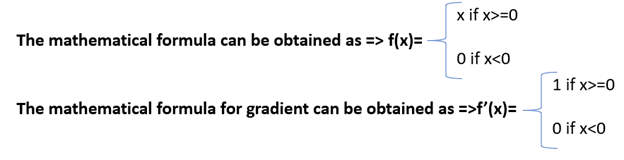

Features:
1. The output works like f(x)=max(0,x), i.e. for x >0 the value x is return else 0 is returned.
2. The gradient works like f’(x)=1 for x>0 and 0 for x<=0.
3. This is a conditional activation function i.e. neurons are getting activated if x>0 else it gets deactivated.
4. This computationally efficient also as compared to Tanh function. 


In [12]:
def relu_activation_function(x):
    if x>0:
        return x
    else:
        return 0

In [13]:
def relu_gradient(x):
    if x>0:
        return 1
    else:
        return 0

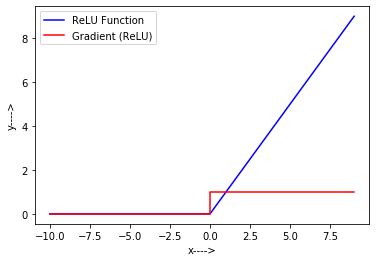

In [14]:
x=np.arange(-10,10)
y=[relu_activation_function(x1) for x1 in x]
y_grad=[(relu_gradient(x1)) for x1 in x]
plt.plot(x, y, "blue",label="ReLU Function")
plt.step(x,y_grad,"red", label="Gradient (ReLU)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=LeakyReLU></a>
## Leaky ReLU

An improvised version of ReLU function. Since the gradient for ReLU becomes 0 when x<=0 that makes ReLU a bit disadvantageous for negative x values. Here comes leaky ReLU to overcome this issue. It won’t let gradient 0 for negative x. The mathematical interpretation can be as below for Leaky ReLU:

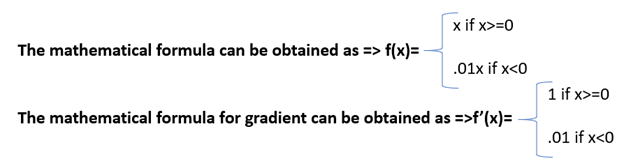


In [15]:
def leaky_relu_function(x):
    if x>=0:
        return x
    else:
        return .1*x

In [16]:
def leaky_relu_gradient_function(x):
    if x>=0:
        return 1
    else:
        return .01

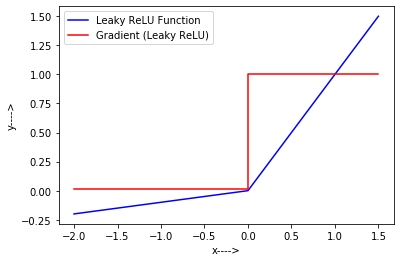

In [17]:
x=np.arange(-2,2,.5)
y=[leaky_relu_function(x1) for x1 in x]
y_grad=[(leaky_relu_gradient_function(x1)) for x1 in x]
plt.plot(x, y, "blue",label="Leaky ReLU Function")
plt.step(x,y_grad,"red",where="post", label="Gradient (Leaky ReLU)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=ParamReLU></a>
## Parameterized Leaky ReLU

Improvised and parameterized ReLU function adds an extra parameter for negative x values. The mathematical representation is as below:

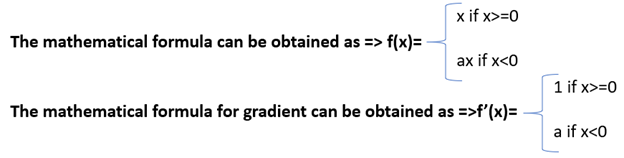


In [18]:
def param_leaky_relu_function(x,a):
    if x>=0:
        return x
    else:
        return a*x

In [19]:
def param_leaky_relu_gradient_function(x,a):
    if x>=0:
        return 1
    else:
        return a

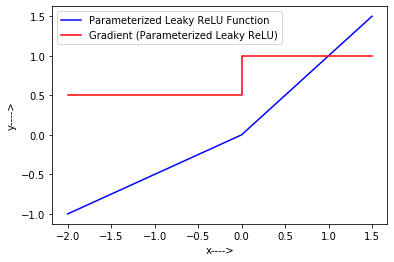

In [20]:
a=.5
x=np.arange(-2,2,.5)
y=[param_leaky_relu_function(x1,a) for x1 in x]
y_grad=[(param_leaky_relu_gradient_function(x1,a)) for x1 in x]
plt.plot(x, y, "blue",label="Parameterized Leaky ReLU Function")
plt.step(x,y_grad,"red",where="post", label="Gradient (Parameterized Leaky ReLU)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=ELU></a>
## ELU (Exponential Linear Unit)

Another improvised version of ReLU is exponential linear unit of ELU. This function gives a nonlinear curve for negative x values unlike leaky ReLU and Parameterized ReLU. ELU defines a log curve for negative values of x. The mathematical representation can be as below:

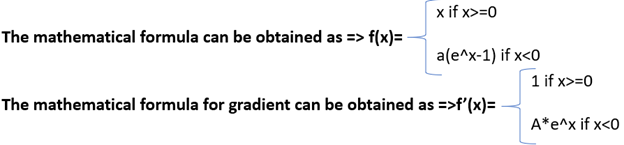


In [35]:
def exp_relu_function(x,a):
    if x>=0:
        return x
    else:
        return a*(np.exp(x)-1)

In [37]:
def exp_relu_gradient(x,a):
      if x>=0:
        return 1
      else:
        return a*np.exp(x)

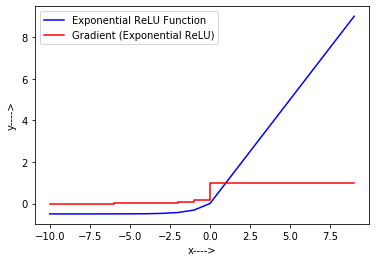

In [38]:
a=.5
x=np.arange(-10,10)
y=[exp_relu_function(x1,a) for x1 in x]
y_grad=[(exp_relu_gradient(x1,a)) for x1 in x]
plt.plot(x, y, "blue",label="Exponential ReLU Function")
plt.step(x,y_grad,"red",where="post", label="Gradient (Exponential ReLU)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=Siwsh></a>
## Swish Function

A powerful yet underrated activation function is Swish function. The interpretability is good and computationally efficient as ReLU. This has been found by Google.

The mathematical interpretation of this activation function is as below:

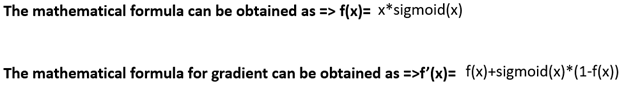


In [49]:
def siwsh_activation_function(x):
    return x*sigmoid_activation_function(x)

In [47]:
def swish_gradient(x):
    return (siwsh_activation_function(x)+
            sigmoid_activation_function(x)*
            (1-siwsh_activation_function(x)))

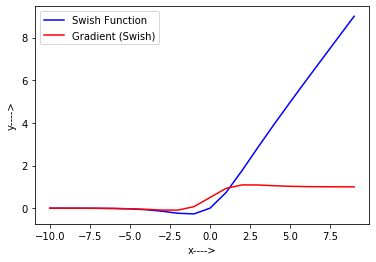

In [48]:
x=np.arange(-10,10)
y=[siwsh_activation_function(x1) for x1 in x]
y_grad=[(swish_gradient(x1,)) for x1 in x]
plt.plot(x, y, "blue",label="Swish Function")
plt.plot(x,y_grad,"red", label="Gradient (Swish)")
plt.xlabel("x---->")
plt.ylabel("y---->")
plt.legend()

<a id=Softmax></a>
## SoftMax Function

The softmax function is used mainly for multiclass classification and used in output layer usually. Since Sigmoid function deals with binary classes and returns the values as 0 or 1 only. Opposite to this softmax returns probability of classes used for classification. The mathematical formula for this can be as below:
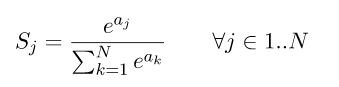

For example, the 3-element vector [1.0, 2.0, 3.0] gets transformed into [0.09, 0.24, 0.67]. The order of elements by relative size is preserved, and they add up to 1.0. Let's tweak this vector slightly into: [1.0, 2.0, 5.0]. We get the output [0.02, 0.05, 0.93], which still preserves these properties. Note that as the last element is farther away from the first two, it's softmax value is dominating the overall slice of size 1.0 in the output. Intuitively, the softmax function is a "soft" version of the maximum function. Instead of just selecting one maximal element, softmax breaks the vector up into parts of a whole (1.0) with the maximal input element getting a proportionally larger chunk, but the other elements getting some of it as well

In [51]:
def softmax_function(x):
    each_exp=np.exp(x)
    each_prob=each_exp/each_exp.sum()
    return each_prob

In [55]:
print(max(softmax_function([1.0, 2.0, 3.0])))

0.6652409557748219


<a id=ChooseRightFUction></a>
# How to choose right activation function

Since there are quite a few activation functions available so we need an intuition or heuristic to pick and use the best activation function. Every use case and problem come with their own complexities and properties. There is no unique thumb rule to decide the activation fictions. Below few points can be used to consider before making decision but ultimately we need to try multiple option if the tried activation function don't give expected result.

1. Sigmoid functions and their combinations generally work better in the case of classifiers
2. Sigmoid and tanh functions are sometimes avoided due to the vanishing gradient problem
3. ReLU function is a general activation function and is used in most cases these days
4. If we encounter a case of dead neurons in our networks the leaky ReLU function is the best choice
5. Always keep in mind that ReLU function should only be used in the hidden layers
6. As a rule of thumb, you can begin with using ReLU function and then move over to other activation functions in case ReLU doesn’t provide with optimum results.

